<a href="https://colab.research.google.com/github/julien-medina-phd/nyc-age-and-sex-distribution/blob/master/NYC_Age_and_Sex_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import lxml #is an html parser
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re #regular expressions module (removing html tags with regular expression is highly discouraged)
import seaborn as sns #nice plots for stats
url = "https://www.baruch.cuny.edu/nycdata/population-geography/age_distribution.htm"
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
title = soup.title
text = soup.get_text()
print(title) #title of the HTML page

<title>NYCdata: Age and Sex Distribution - By County</title>


In [0]:
rows = soup.find_all("tr") #find all table rows <tr> in the bs4.BeautifulSoup object
#print(rows[:10]) #a list
for row in rows:
    row_td = row.find_all("td") #in HTML: in a table row <tr> there are table data/cell <td>
print(row_td)
type(row_td) #bs4.element.ResultSet
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells,"lxml").get_text() #.get_text() method extract the text without html tags
print(cleantext)

[<td> </td>, <td colspan="7"> </td>, <td> </td>]
[ ,  ,  ]


In [0]:
BeautifulSoup(str(soup.find_all("td")),"lxml").get_text()

'[\xa0, \n\n Population & Geography\n\n, \xa0, \xa0, \n\nNew York City (NYC)\r\n\r\n        Age and Sex Distribution  - By County\r\n\r\n        \n\n, \xa0, \xa0, \n\n Back to Section  \n\n, \xa0, \xa0, 2017 Estimates*, \xa0, \xa0, \xa0, NYC, Manhattan, Bronx, Brooklyn\r\n\r\n      (Kings), Queens, Staten\r\n\r\n      Island\r\n\r\n      (Richmond), \xa0, \xa0, Total Population, 8,622,698 , 1,664,727, 1,471,160, 2,648,771, 2,358,582, 479,458, \xa0, \xa0, Sex, \xa0, \xa0, \xa0, Male, 4,112,539 , 789,155, 693,457, 1,254,273, 1,143,636, 232,018, \xa0, \xa0, Female, 4,510,159, 875,572, 777,703, 1,394,498, 1,214,946, 247,440, \xa0, \xa0, , \xa0, \xa0, Age, \xa0, \xa0, \xa0, Under 5 years, 6.4% , 4.8% , 7.2% , 7.3% , 6.2% , 5.7% , \xa0, \xa0, 5 to 9 years, 5.5% , 3.8% , 6.8% , 5.9% , 5.4% , 5.9% , \xa0, \xa0, 10 to 14 years, 5.6% , 3.7% , 6.8% , 6.2% , 5.4% , 6.4% , \xa0, \xa0, 15 to 19 years, 5.3% , 4.2% , 6.8% , 5.4% , 5.1% , 5.8% , \xa0, \xa0, 20 to 24 years, 6.7% , 7.0% , 7.7% , 6.4% , 6

In [0]:
zzz[10]

'u'

In [0]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[ ,  ,  ]


str

In [0]:
df = pd.DataFrame(list_rows)
type(df) #pandas.core.frame.DataFrame
df.head(10)

,0
0,"[ , \n\n Population &amp; Geography\n\n, ]"
1,"[ , \n\nNew York City (NYC)\r\n\r\n Age..."
2,"[ , \n\n Back to Section \n\n, ]"
3,"[ , 2017 Estimates*, ]"
4,"[ , , NYC, Manhattan, Bronx, Brooklyn\r\n\r\n..."
5,"[ , Total Population, 8,622,698 , 1,664,727, 1..."
6,"[ , Sex, , ]"
7,"[ , Male, 4,112,539 , 789,155, 693,457, 1,254,..."
8,"[ , Female, 4,510,159, 875,572, 777,703, 1,394..."
9,"[ , , ]"


In [0]:
df['colname'] = df['colname'].str.replace(',', '').astype(float)

In [0]:
type(df[0]) # pandas.core.series.Series
df1 = df[0].str.split(',', expand=True)
df1.head(10)
#type(df1) # pandas.core.frame.DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,[,\n\n Population &amp; Geography\n\n,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,[,\n\nNew York City (NYC)\r\n\r\n Age an...,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,[,\n\n Back to Section \n\n,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,[,2017 Estimates*,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,[,,NYC,Manhattan,Bronx,Brooklyn\r\n\r\n (Kings),Queens,Staten\r\n\r\n Island\r\n\r\n (Rich...,],None,None,None,None,None,None,None,None,None,None,None
5,[,Total Population,8,622,698,1,664,727,1,471,160,2,648,771,2,358,582,479,458,]
6,[,Sex,,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,[,Male,4,112,539,789,155,693,457,1,254,273,1,143,636,232,018,],None,None
8,[,Female,4,510,159,875,572,777,703,1,394,498,1,214,946,247,440,],None,None
9,[,,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
df2=df1.drop(0,axis=1)
df2.head(20)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,\n\n Population &amp; Geography\n\n,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,\n\nNew York City (NYC)\r\n\r\n Age an...,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,\n\n Back to Section \n\n,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2017 Estimates*,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,,NYC,Manhattan,Bronx,Brooklyn\r\n\r\n (Kings),Queens,Staten\r\n\r\n Island\r\n\r\n (Rich...,],None,None,None,None,None,None,None,None,None,None,None
5,Total Population,8,622,698,1,664,727,1,471,160,2,648,771,2,358,582,479,458,]
6,Sex,,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Male,4,112,539,789,155,693,457,1,254,273,1,143,636,232,018,],None,None
8,Female,4,510,159,875,572,777,703,1,394,498,1,214,946,247,440,],None,None
9,,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
df3 = df2.drop([0,1,2,3,5,6,7,8,9])
df3.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
4,,NYC,Manhattan,Bronx,Brooklyn\r\n\r\n (Kings),Queens,Staten\r\n\r\n Island\r\n\r\n (Rich...,],None,None,None,None,None,None,None,None,None,None,None
10,Age,,],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11,Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%,],None,None,None,None,None,None,None,None,None,None,None
12,5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%,],None,None,None,None,None,None,None,None,None,None,None
13,10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%,],None,None,None,None,None,None,None,None,None,None,None
14,15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%,],None,None,None,None,None,None,None,None,None,None,None
15,20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%,],None,None,None,None,None,None,None,None,None,None,None
16,25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%,],None,None,None,None,None,None,None,None,None,None,None
17,30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%,],None,None,None,None,None,None,None,None,None,None,None
18,35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%,],None,None,None,None,None,None,None,None,None,None,None


In [0]:
df4=df3.drop([8,9,10,11,12,13,14,15,16,17,18,19],axis=1)
df4.head(10)

,1,2,3,4,5,6,7
4,,NYC,Manhattan,Bronx,Brooklyn\r\n\r\n (Kings),Queens,Staten\r\n\r\n Island\r\n\r\n (Rich...
10,Age,,],None,None,None,None
11,Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%
12,5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%
13,10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%
14,15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%
15,20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%
16,25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%
17,30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%
18,35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%


In [0]:
df5=df4.loc[:28,:]
df5

,1,2,3,4,5,6,7
4,,NYC,Manhattan,Bronx,Brooklyn\r\n\r\n (Kings),Queens,Staten\r\n\r\n Island\r\n\r\n (Rich...
10,Age,,],None,None,None,None
11,Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%
12,5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%
13,10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%
14,15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%
15,20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%
16,25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%
17,30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%
18,35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%


In [0]:
df5.iloc[0][5] = "Brooklyn (Kings)"

In [0]:
df5.iloc[0][7] = "Staten Island (Richmond)"

In [0]:
df6 = df5.rename(columns=df4.iloc[0])

In [0]:
df6

,,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
4,,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
10,Age,,],None,None,None,None
11,Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%
12,5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%
13,10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%
14,15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%
15,20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%
16,25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%
17,30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%
18,35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%


In [0]:
df6.index=list(df6[" \xa0"])
df6

,,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
,,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
Age,Age,,],None,None,None,None
Under 5 years,Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%
5 to 9 years,5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%
10 to 14 years,10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%
15 to 19 years,15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%
20 to 24 years,20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%
25 to 29 years,25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%
30 to 34 years,30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%
35 to 39 years,35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%


In [0]:
df6[" \xa0"]

                                        
 Age                                 Age
 Under 5 years             Under 5 years
 5 to 9 years               5 to 9 years
 10 to 14 years           10 to 14 years
 15 to 19 years           15 to 19 years
 20 to 24 years           20 to 24 years
 25 to 29 years           25 to 29 years
 30 to 34 years           30 to 34 years
 35 to 39 years           35 to 39 years
 40 to 44 years           40 to 44 years
 45 to 49 years           45 to 49 years
 50 to 54 years           50 to 54 years
 55 to 59 years           55 to 59 years
 60 to 64 years           60 to 64 years
 65 to 69 years           65 to 69 years
 70 to 74 years           70 to 74 years
 75 to 79 years           75 to 79 years
 80 to 84 years           80 to 84 years
 85 years and over     85 years and over
Name:   , dtype: object

In [0]:
df7 = df6.drop(["Age"],axis=0)

KeyError: "['Age'] not found in axis"

In [0]:
df6.drop([" Age"])

,,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
,,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
Under 5 years,Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%
5 to 9 years,5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%
10 to 14 years,10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%
15 to 19 years,15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%
20 to 24 years,20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%
25 to 29 years,25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%
30 to 34 years,30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%
35 to 39 years,35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%
40 to 44 years,40 to 44 years,6.4%,6.1%,6.2%,6.4%,6.4%,7.0%


In [0]:
df6.columns

Index(['  ', ' NYC', ' Manhattan', ' Bronx', 'Brooklyn (Kings)', ' Queens',
       'Staten Island (Richmond)'],
      dtype='object')

In [0]:
df7=df6.drop([" \xa0"],axis=1)

In [0]:
df8=df7.drop([" Age"])

In [0]:
df8

,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
,NYC,Manhattan,Bronx,Brooklyn (Kings),Queens,Staten Island (Richmond)
Under 5 years,6.4%,4.8%,7.2%,7.3%,6.2%,5.7%
5 to 9 years,5.5%,3.8%,6.8%,5.9%,5.4%,5.9%
10 to 14 years,5.6%,3.7%,6.8%,6.2%,5.4%,6.4%
15 to 19 years,5.3%,4.2%,6.8%,5.4%,5.1%,5.8%
20 to 24 years,6.7%,7.0%,7.7%,6.4%,6.1%,6.5%
25 to 29 years,9.4%,11.8%,8.7%,9.6%,8.5%,7.2%
30 to 34 years,8.6%,10.8%,7.4%,8.9%,7.9%,6.2%
35 to 39 years,7.3%,8.2%,6.4%,7.5%,7.4%,5.8%
40 to 44 years,6.4%,6.1%,6.2%,6.4%,6.4%,7.0%


ValueError: could not convert string to float: ' NYC'

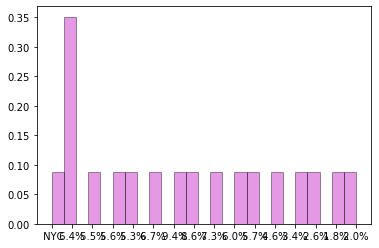

In [0]:
x = df8[' NYC']
ax = sns.distplot(x, hist=True, kde=True, rug=True, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()